# Atividade

## Discentes: Bruno Senna, Iuri Rodrigo e Vinicius
## Docente: Prabhat Kumar de Oliveira

In [ ]:
# Instalando o Qiuuckdraw
!pip install quickdraw


In [ ]:
# Importando bibliotecas

import numpy as np
import  pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import json


# Analisando dataset "Bread"

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Coloca ele no file_url
import requests

file_url = 'https://storage.googleapis.com/quickdraw_dataset/full/raw/bread.ndjson'

file_stream = requests.get(file_url, stream=True)

with open('dataset.ndjson', 'wb') as local_file:
    for data in file_stream:
        local_file.write(data)

print('Done')

Done


In [ ]:
#E passa o path pra cá
path = "/content/dataset.ndjson"

records = map(json.loads, open(path))

df1 = pd.DataFrame.from_records(records)

In [ ]:
df1

,word,countrycode,timestamp,recognized,key_id,drawing
0,bread,US,2017-01-25 19:53:24.835 UTC,True,5740525556596736,"[[[491, 493, 495, 497, 499, 501, 502, 503, 504..."
1,bread,US,2017-03-27 14:35:09.99875 UTC,True,6272884819361792,"[[[142, 140, 140, 140, 140, 140, 140, 140, 140..."
2,bread,US,2017-03-15 01:28:01.07855 UTC,True,6614599430307840,"[[[266, 258, 254, 251, 249, 248, 239, 230, 224..."
3,bread,DE,2017-01-31 21:19:45.15262 UTC,True,6013647694331904,"[[[504, 511, 521, 527, 534, 542, 551, 559, 570..."
4,bread,GB,2017-01-30 11:29:09.83228 UTC,True,5732518261161984,"[[[437, 442, 447, 452, 458, 464, 472, 479, 488..."
...,...,...,...,...,...,...
120565,bread,RU,2017-03-12 06:00:05.14994 UTC,True,6587443107069952,"[[[195, 216, 237, 247, 287, 301, 313, 327, 339..."
120566,bread,US,2017-03-03 16:42:19.7431 UTC,True,6680431900491776,"[[[803, 796, 791, 784, 779, 773, 765, 758, 752..."
120567,bread,NZ,2017-03-17 21:56:03.7501 UTC,False,4679084766396416,"[[[1122, 1112, 1105, 1097, 1087, 1076, 1063, 1..."
120568,bread,US,2017-03-27 15:40:44.03035 UTC,True,5928024513970176,"[[[317, 318, 318, 318, 318, 318, 318, 318, 318..."


In [ ]:
del df1['key_id']

In [ ]:
del df1['timestamp']

# Países que mais desenham

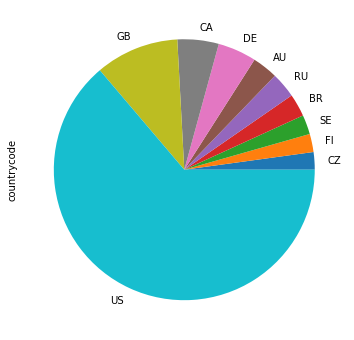

In [ ]:
df1.groupby(['countrycode']).countrycode.count().sort_values()[-10:].plot(kind='pie',figsize=(12,6))

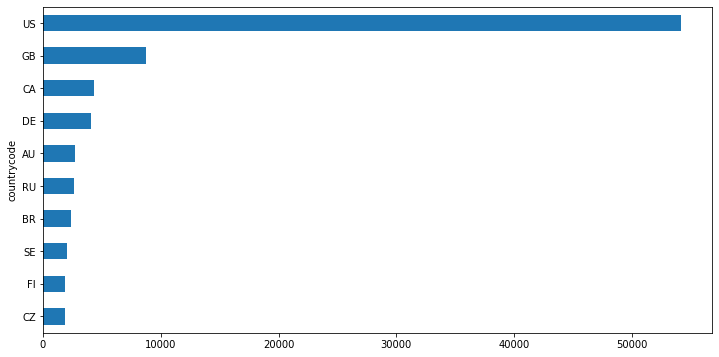

In [ ]:
df1.groupby(['countrycode']).countrycode.count().sort_values()[-10:].plot(kind='barh',figsize=(12,6))

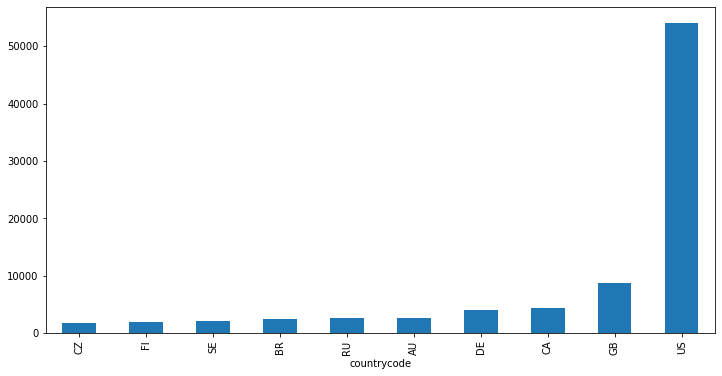

In [ ]:
df1.groupby(['countrycode']).countrycode.count().sort_values()[-10:].plot(kind='bar',figsize=(12,6))

# Comparação entre desenhos reconhecidos e não reconhecidos pela I.A

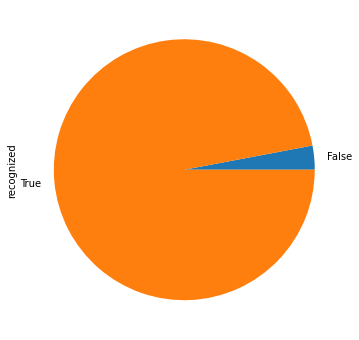

In [ ]:
df1.groupby(['recognized']).recognized.count().sort_values()[-10:].plot(kind='pie',figsize=(12,6))

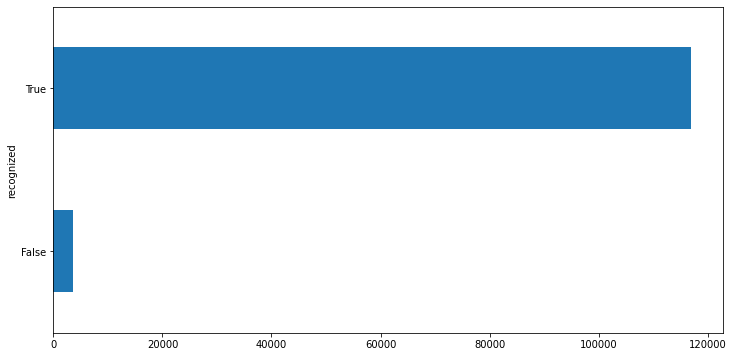

In [ ]:
df1.groupby(['recognized']).recognized.count().sort_values()[-10:].plot(kind='barh',figsize=(12,6))

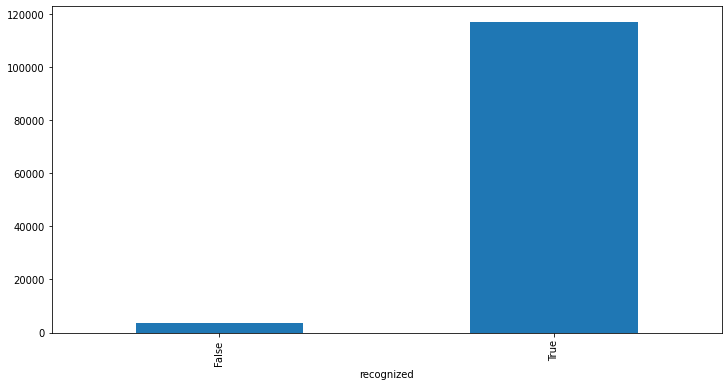

In [ ]:
df1.groupby(['recognized']).recognized.count().sort_values()[-10:].plot(kind='bar',figsize=(12,6))

# Armazenando imagens

In [ ]:
lista = []

from quickdraw import QuickDrawDataGroup
bread = QuickDrawDataGroup("bread",max_drawings=500)

loading bread drawings
load complete


In [ ]:
bread_true = bread.search_drawings(recognized=True)
bread_false = bread.search_drawings(recognized=False)
!mkdir bread_images

mkdir: cannot create directory ‘bread_images’: File exists


In [ ]:
for i in range(400):
   img = bread_true[i]
   img = img.image.save(f'/content/bread_images/breads{i}.jpeg')

# Algumas imagens reconhecidas

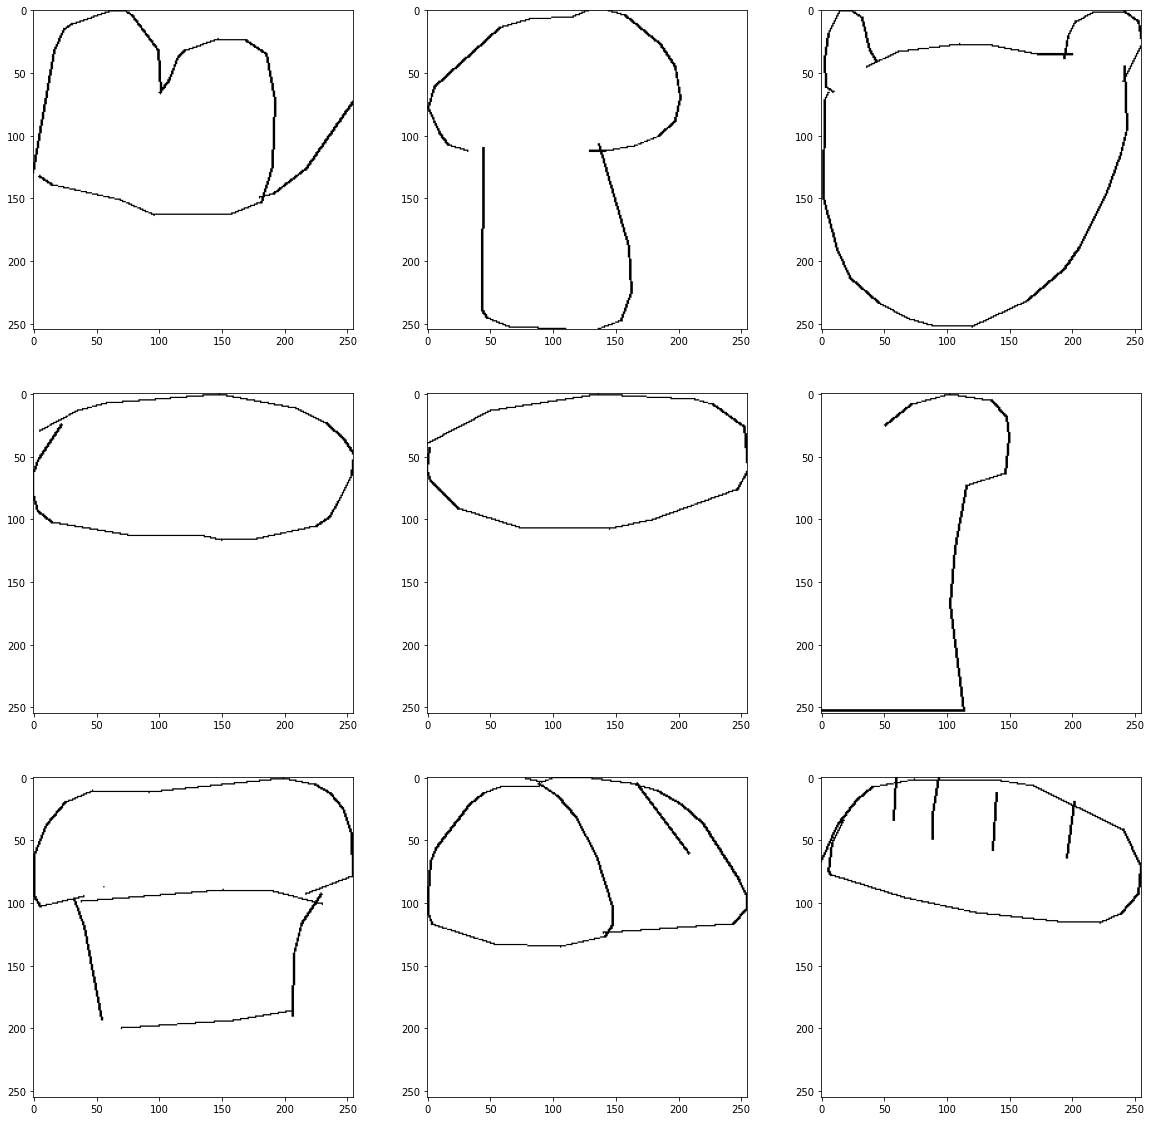

In [ ]:
plt.figure(figsize=(20,20))
for i in range(9):
  img = bread_true[i]
  img.image.save('bread.png')
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.imread('/content/bread.png'))

# Algumas imagens não reconhecidas

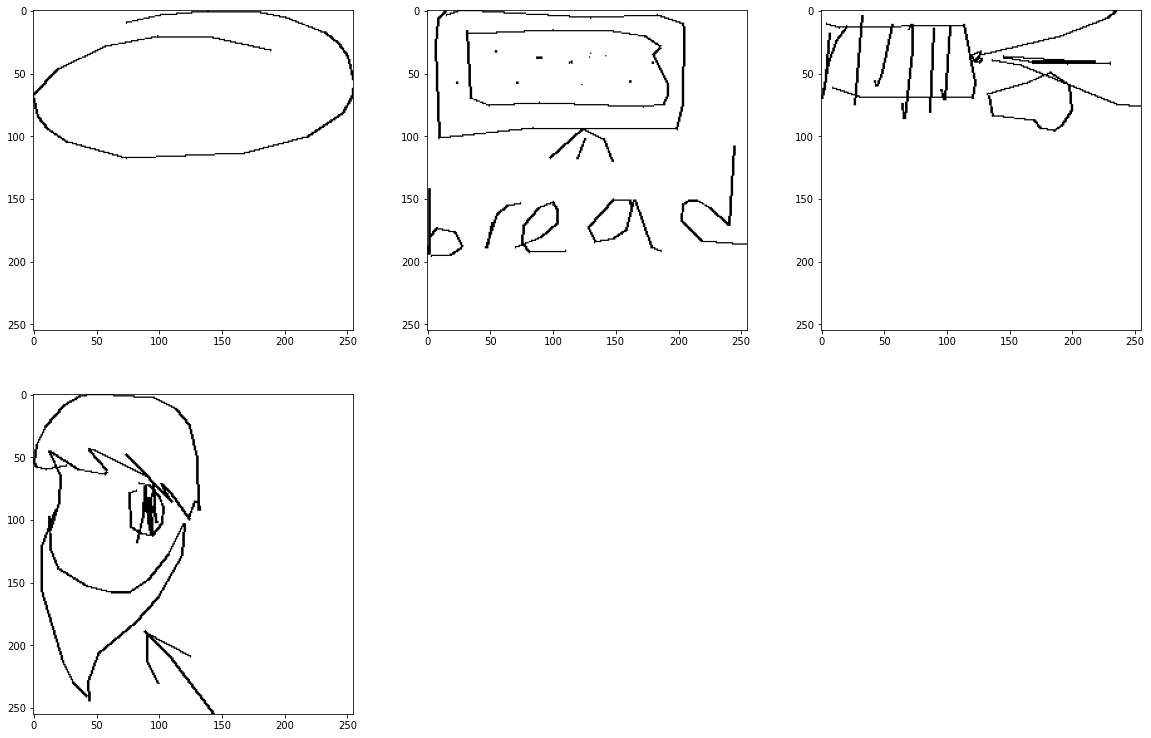

In [ ]:
plt.figure(figsize=(20,20))
for i in range(4):
  img = bread_false[i]
  img.image.save('bread.png')
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.imread('/content/bread.png'))

# Analisando dataset "Ant"

In [ ]:
#Coloca ele no file_url
import requests

file_url = 'https://storage.googleapis.com/quickdraw_dataset/full/raw/ant.ndjson'

file_stream = requests.get(file_url, stream=True)

with open('dataset.ndjson', 'wb') as local_file:
    for data in file_stream:
        local_file.write(data)

print('Done')

Done


In [ ]:
#E passa o path pra cá
path = "/content/dataset.ndjson"

records = map(json.loads, open(path))

df2 = pd.DataFrame.from_records(records)

In [ ]:
df2

,word,countrycode,timestamp,recognized,key_id,drawing
0,ant,US,2017-03-27 00:14:57.31033 UTC,True,5421013154136064,"[[[460, 448, 441, 433, 428, 426, 426, 426, 431..."
1,ant,US,2017-03-06 20:00:22.52156 UTC,True,4836123148812288,"[[[851, 847, 848, 853, 854, 850], [412, 418, 4..."
2,ant,US,2017-01-23 19:53:28.35453 UTC,True,5720952853757952,"[[[543, 537, 530, 523, 518, 512, 507, 502, 493..."
3,ant,US,2017-03-14 14:52:27.52141 UTC,True,6345979559149568,"[[[645, 640, 635, 628, 626, 632, 641, 646, 650..."
4,ant,US,2017-01-25 21:48:31.2564 UTC,True,4704383923126272,"[[[707.625, 707.625, 706.5, 705.375, 705.375, ..."
...,...,...,...,...,...,...
124607,ant,US,2017-01-24 17:26:44.50154 UTC,True,5190276123459584,"[[[613, 606, 600, 591, 584, 574, 566, 560, 553..."
124608,ant,GB,2017-03-11 15:07:56.73119 UTC,True,4815776882098176,"[[[141.33299255371094, 136.9290008544922, 131...."
124609,ant,SE,2017-03-13 12:55:25.26465 UTC,True,6047771607957504,"[[[535, 528, 523, 516, 509, 503, 497, 488, 482..."
124610,ant,US,2017-03-10 22:21:31.17616 UTC,True,5035518817468416,"[[[87, 81, 76, 68, 62, 56, 51, 44, 44, 44, 47,..."


In [ ]:
del df2['timestamp']

In [ ]:
del df2['key_id']

# Países que mais desenham

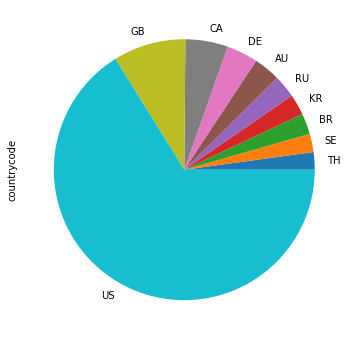

In [ ]:
df2.groupby(['countrycode']).countrycode.count().sort_values()[-10:].plot(kind='pie',figsize=(12,6))


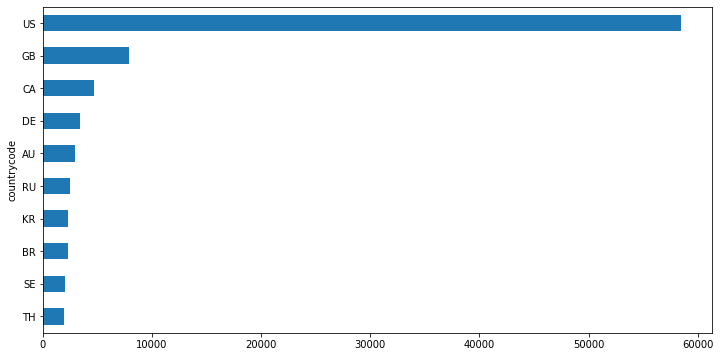

In [ ]:
df2.groupby(['countrycode']).countrycode.count().sort_values()[-10:].plot(kind='barh',figsize=(12,6))

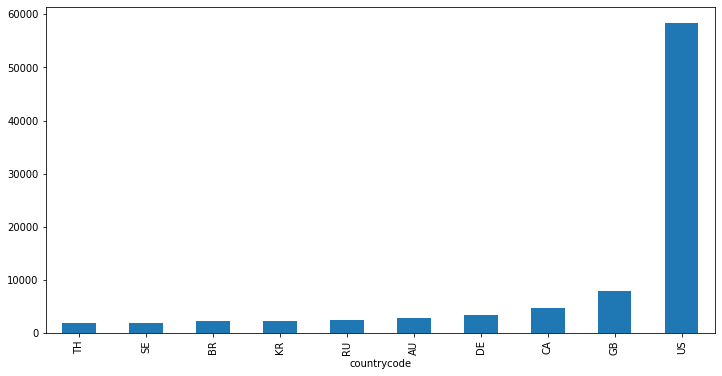

In [ ]:
df2.groupby(['countrycode']).countrycode.count().sort_values()[-10:].plot(kind='bar',figsize=(12,6))

# Comparação entre desenhos reconhecidos e não reconhecidos pela I.A

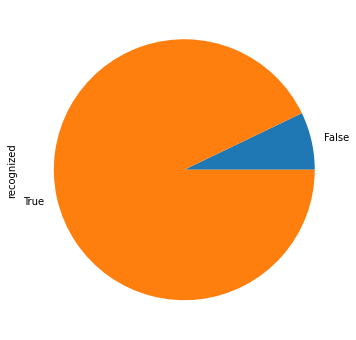

In [ ]:
df2.groupby(['recognized']).recognized.count().sort_values()[-10:].plot(kind='pie',figsize=(12,6))

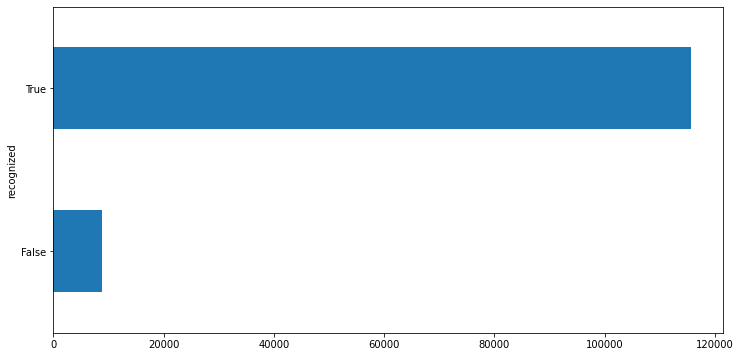

In [ ]:
df2.groupby(['recognized']).recognized.count().sort_values()[-10:].plot(kind='barh',figsize=(12,6))

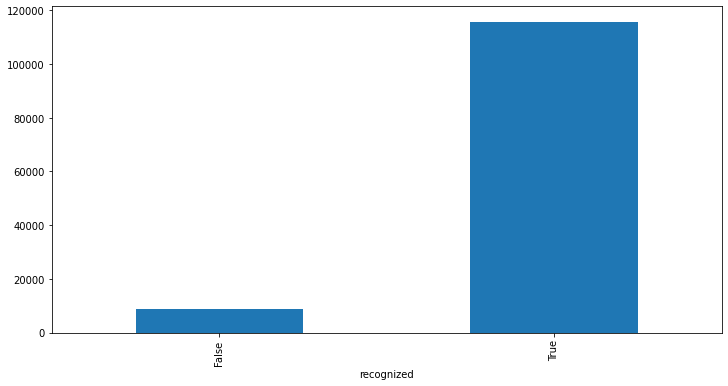

In [ ]:
df2.groupby(['recognized']).recognized.count().sort_values()[-10:].plot(kind='bar',figsize=(12,6))

# Armazenando imagens

In [ ]:
from PIL import Image


Tentar armazenar imagens dos grupos ('bread' e 'ant') para treinar uma rede GAN para geração de novas imagens

In [ ]:
lista = []

from quickdraw import QuickDrawDataGroup
ant = QuickDrawDataGroup("ant",max_drawings=500)

loading ant drawings
load complete


In [ ]:
ant_true = ant.search_drawings(recognized=True)
ant_false = ant.search_drawings(recognized=False)
!mkdir ant_images

mkdir: cannot create directory ‘ant_images’: File exists


In [ ]:
for i in range(400):
   img = ant_true[i]
   img = img.image.save(f'/content/ant_images/ants{i}.jpeg')

# Algumas imagens reconhecidas

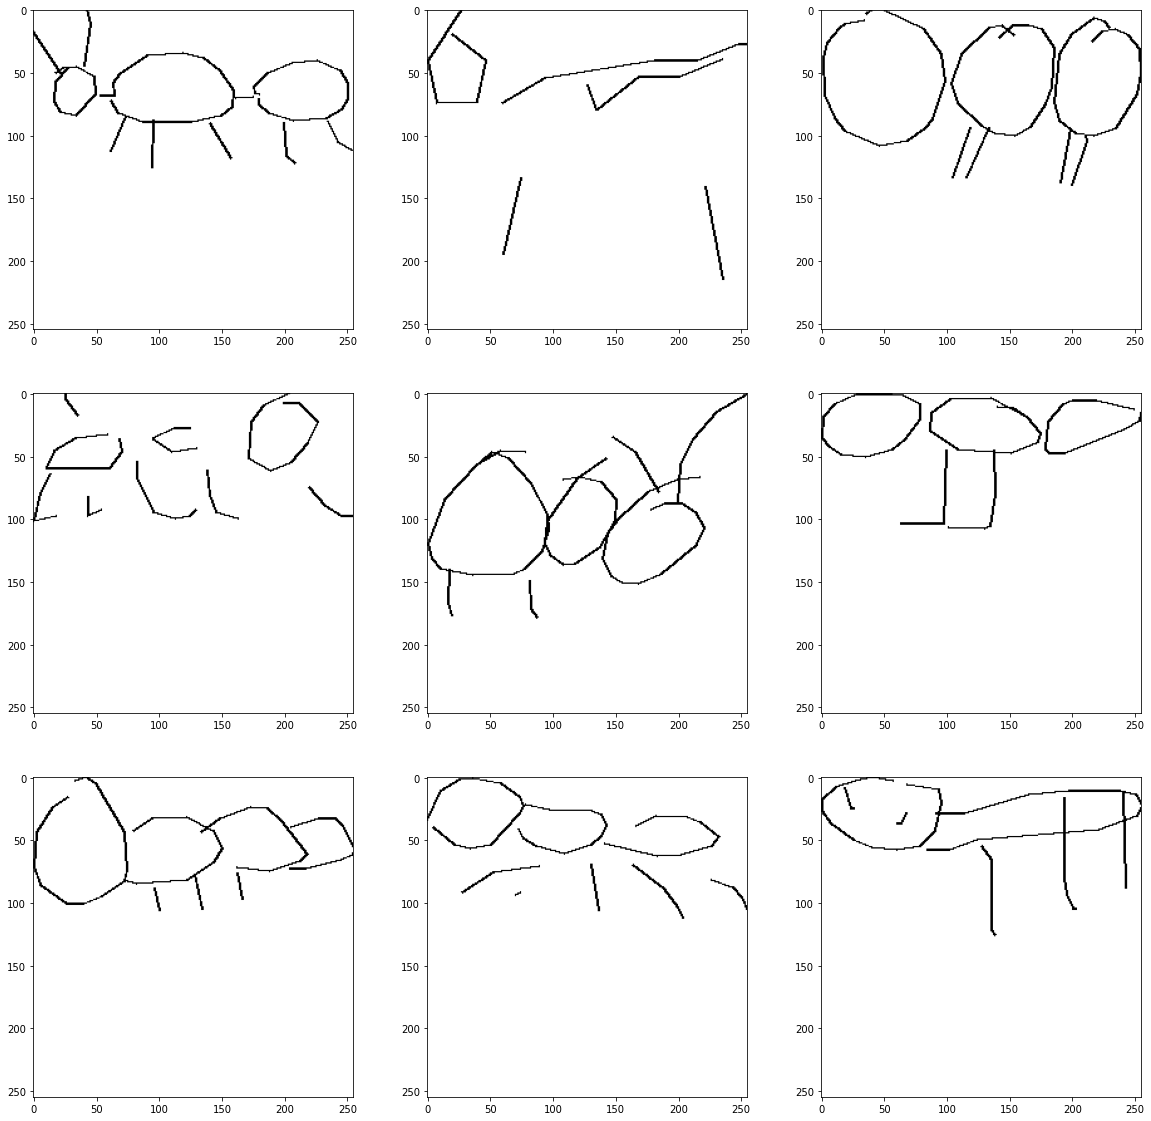

In [ ]:
plt.figure(figsize=(20,20))
for i in range(9):
  img = ant_true[i]
  img.image.save('ant.png')
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.imread('/content/ant.png'))

# Algumas imagens não reconhecidas

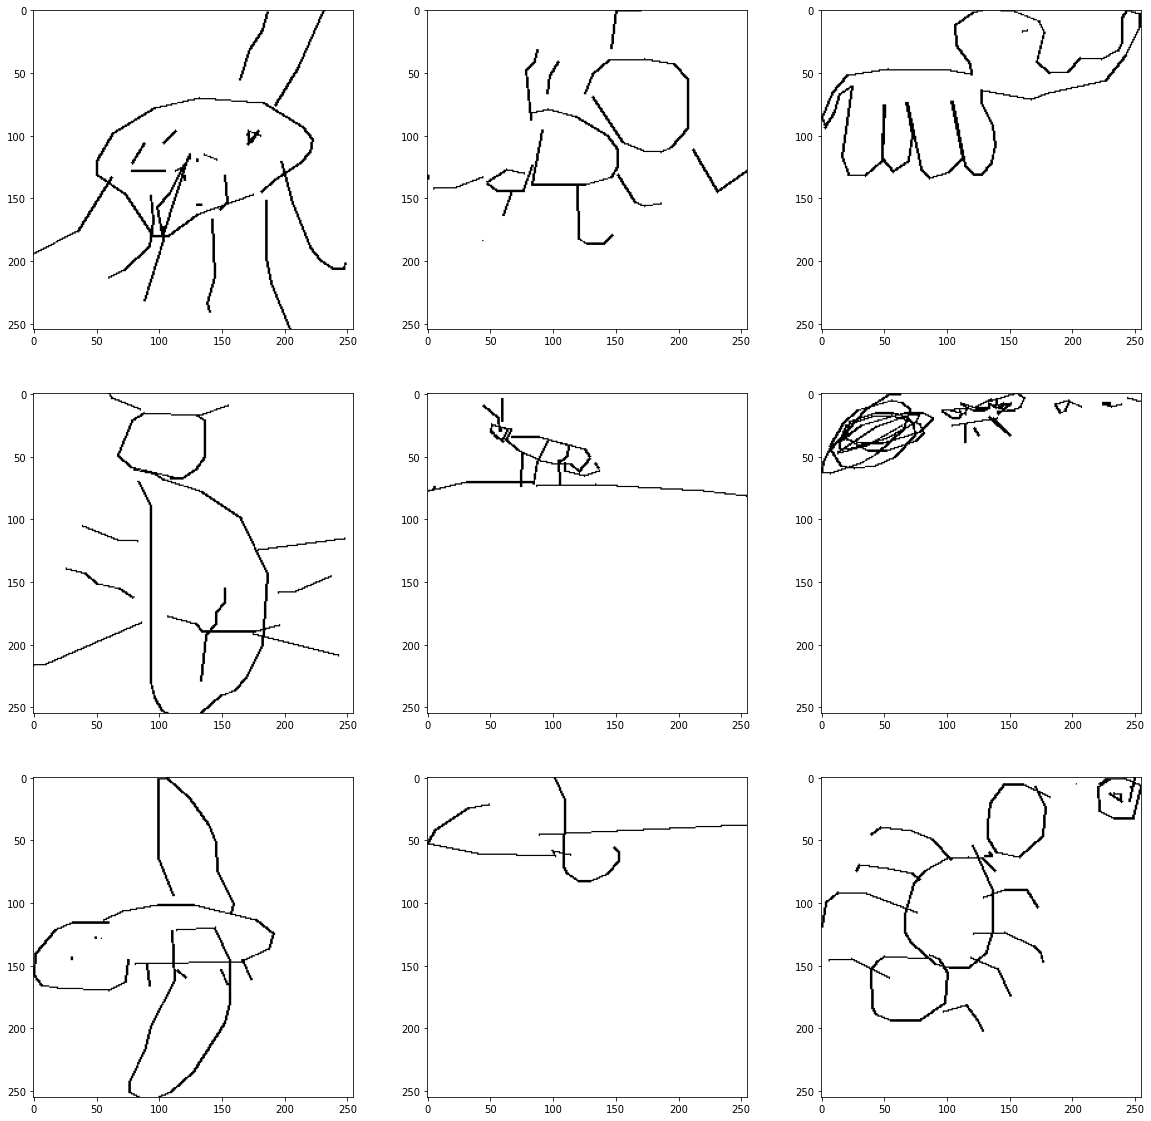

In [ ]:
plt.figure(figsize=(20,20))
for i in range(9):
  img = ant_false[i]
  img.image.save('ant.png')
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.imread('/content/ant.png'))

# Armazenando as imagens em formato array

In [ ]:
'''import glob
import cv2 as cv

path = glob.glob("/content/ant_images/*.jpeg")
cv_img = []
for img in path:
    n = cv.imread(img)
    cv_img.append(n)'''

'import glob\nimport cv2 as cv\n\npath = glob.glob("/content/ant_images/*.jpeg")\ncv_img = []\nfor img in path:\n    n = cv.imread(img)\n    cv_img.append(n)'

In [ ]:
#X = np.array(cv_img)

In [ ]:
#X.shape

In [ ]:
from os import listdir
from os.path import isfile, join

mypath='/content/ant_images'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)

for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread(join(mypath,onlyfiles[n]))

In [ ]:
x = np.array(images)

In [ ]:
x.shape

(400,)

# Gan

In [ ]:
from keras.layers import Input, Dense, Reshape, Flatten, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

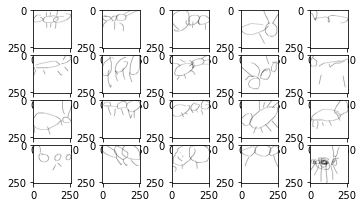

In [ ]:
# Apresenta as imagens do dataset em escala de cinza
for i in range(20):
    plt.subplot(5, 5, 1 + i)
    plt.imshow(x[i], cmap=plt.get_cmap('gray'))
# Apresenta os dígitos
plt.show()

In [ ]:
img_rows = 400
img_cols = 64
channels = 3
img_shape = (img_rows,img_cols,channels)
latent_dim = 10
batch_size = 16
epsilon_std = 1.0

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon


In [ ]:
def build_encoder():
    img = Input(shape=img_shape)
    h = Flatten()(img)
    h = Dense(512)(h)
    h = LeakyReLU(alpha=0.2)(h)
    h = Dense(512)(h)
    h = LeakyReLU(alpha=0.2)(h)
    mu = Dense(latent_dim)(h)
    log_var = Dense(latent_dim)(h)
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([mu, log_var])
    return Model(img, z)

In [ ]:
def build_decoder():
    model = Sequential()
    model.add(Dense(512, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    # tanh is more robust: gradient not equal to 0 around 0
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))
    model.summary()
    z = Input(shape=(latent_dim,))
    img = model(z)
    return Model(z, img)

In [ ]:
def build_discriminator():
    model = Sequential()
    model.add(Dense(512, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()
    encoded_repr = Input(shape=(latent_dim,))
    validity = model(encoded_repr)
    return Model(encoded_repr, validity)

In [ ]:
optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

# Build the encoder / decoder
encoder = build_encoder()
decoder = build_decoder()

img = Input(shape=img_shape)
# The generator takes the image, encodes it and reconstructs it
# from the encoding
encoded_repr = encoder(img)
reconstructed_img = decoder(encoded_repr)

# For the adversarial_autoencoder model we will only train the generator
# if discriminator is attached to generator, set this flag to fix discriminator
discriminator.trainable = False

# The discriminator determines validity of the encoding
validity = discriminator(encoded_repr)

# The adversarial_autoencoder model  (stacked generator and discriminator)
adversarial_autoencoder = Model(img, [reconstructed_img, validity])
adversarial_autoencoder.compile(loss=['mse', 'binary_crossentropy'], loss_weights=[0.999, 0.001], optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5632      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 137,217
Trainable params: 137,217
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                

In [ ]:
def train(epochs, batch_size=128, sample_interval=50):

    # Rescale -1 to 1
    X_train = (x.astype(np.float64))
    X_train = np.expand_dims(x, axis=3)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        #  Train Discriminator

        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        latent_fake = encoder.predict(imgs)
        latent_real = np.random.normal(size=(batch_size, latent_dim))

        # Train the discriminator
        # let latent_real's output is close to 1
        d_loss_real = discriminator.train_on_batch(latent_real, valid)
        # let latent_fake's output is close to 0
        d_loss_fake = discriminator.train_on_batch(latent_fake, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        # decrease reconstruction error and let discriminator's output is close to 1
        g_loss = adversarial_autoencoder.train_on_batch(imgs, [imgs, valid])

        # If at save interval
        if epoch % sample_interval == 0:
            # Plot the progress
            print("%d [D loss: %f, acc: %.2f%%] [G loss: %f, mse: %f]" % (
                epoch, d_loss[0], 100 * d_loss[1], g_loss[0], g_loss[1]))
            # save generated image samples
            sample_images(epoch)

In [ ]:
# Save generated images per specified epochs
def sample_images(epoch):
    r, c = 5, 5
    z = np.random.normal(size=(r * c, latent_dim))
    gen_imgs = decoder.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    fig.savefig("ant_%d.jpeg" % epoch)
    plt.close()

In [ ]:
epochs = 2000
sample_interval = 200
sample_count = epochs/sample_interval

In [ ]:
#train(epochs=epochs, batch_size=batch_size, sample_interval=sample_interval)

In [ ]:
#Image.open('ant_200.jpeg')
